In [805]:
import sys  
# sys.path.insert(0, '../')
# sys.path.append("..")

In [809]:
%pwd

'/home/antonios/repos/incremental_rec_base_code/notebooks'

In [808]:
# %cd notebooks

/home/antonios/repos/incremental_rec_base_code/notebooks


In [810]:
import tensorflow as tf
import numpy as np
from scipy.stats import chisquare
from scipy.stats import pearsonr
import tensorflow as tf
from sklearn.cluster import KMeans
from tqdm.notebook import tqdm
from data_utils.data_generator import Data
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.patches import Rectangle
import os
import scipy.stats
from collections import defaultdict
import seaborn as sns
from multiprocessing import Pool
# sns.set_theme(style="whitegrid")
sns.set_theme(style="ticks")

In [811]:
np.load('../Sanity_check/Gowalla-20/i_emb_b0e1.npy')-np.load('../Sanity_check/Gowalla-20/i_emb_b0e2.npy') # first layer

array([[-0.00141193,  0.00927708,  0.01027245, ..., -0.01036311,
        -0.00705116, -0.01059608],
       [-0.03116024,  0.02192542,  0.0152043 , ..., -0.02022689,
        -0.00942417, -0.00768674],
       [-0.01561655,  0.01556659,  0.01232312, ..., -0.01460884,
        -0.00894723, -0.00871485],
       ...,
       [ 0.00680377, -0.00066712, -0.00091042, ...,  0.00664533,
         0.00040859, -0.00735403],
       [ 0.02812242, -0.02524598, -0.02152478, ...,  0.02135604,
         0.01091902,  0.01378595],
       [-0.01626592,  0.02066729,  0.01573579, ..., -0.01825368,
        -0.01395829, -0.01480484]])

In [812]:
np.load('../Sanity_check/Gowalla-20/i_rep_b0e1.npy')-np.load('../Sanity_check/Gowalla-20/i_rep_b0e2.npy') # last layer

array([[-0.02523282, -0.06616146,  0.03161509, ...,  0.01541865,
         0.00952103,  0.03397046],
       [-0.06340286, -0.08120327,  0.08351526, ...,  0.01963532,
         0.06925605,  0.0295751 ],
       [-0.06523325, -0.11216206,  0.10618272, ...,  0.02750571,
         0.04769871,  0.05409094],
       ...,
       [ 0.03827883, -0.0763162 , -0.03519423, ...,  0.04662219,
        -0.00865903, -0.01926437],
       [ 0.0281087 ,  0.0865013 , -0.00563198, ..., -0.10261652,
        -0.07381214, -0.05110321],
       [-0.06536951, -0.00806747,  0.04124508, ..., -0.05386134,
         0.05314587,  0.00681969]])

In [813]:
np.load('../Sanity_check/Gowalla-20/u_rep_b0e2.npy')-np.load('../Sanity_check/Gowalla-20/u_rep_b0e3.npy') # last layer

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11116969, -0.20885044,  0.03463325, ...,  0.28648898,
        -0.0342051 ,  0.06872069],
       [ 0.02259343, -0.03977606, -0.0246038 , ...,  0.00753371,
        -0.05927214, -0.02168302],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.11151698, -0.19750876, -0.01170402, ...,  0.23378938,
        -0.02955455,  0.07651853],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [814]:
np.load('../Sanity_check/Gowalla-20/u_rep_b0e1.npy')-np.load('../Sanity_check/Gowalla-20/u_rep_b0e23.npy') # last layer

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.26450217, -0.25268292, -0.01584368, ...,  0.31444245,
        -0.07940836, -0.21031743],
       [ 0.34321488, -0.0927035 , -0.42268493, ...,  0.49208882,
         0.10062252, -0.03912431],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.29573864, -0.27759114, -0.24394307, ...,  0.39582563,
        -0.05433907,  0.07249454],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [815]:
np.load('../Sanity_check/Gowalla-20/g_norm_b0e1.npy')-np.load('../Sanity_check/Gowalla-20/g_norm_b0e2.npy')[:5569]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [816]:
np.load('../Sanity_check/Gowalla-20/g_norm_b1e1.npy')-np.load('../Sanity_check/Gowalla-20/g_norm_b1e7.npy')

array([[-3.35928926e-05,  3.46877106e-05, -4.00125998e-05, ...,
         5.89786792e-06, -2.50583420e-05,  2.97889272e-05],
       [ 1.08149138e-04, -1.21926789e-04,  1.34945198e-04, ...,
        -1.97985844e-05,  9.07002988e-05, -9.84286528e-05],
       [ 5.02340045e-06, -5.74360530e-06,  6.41609582e-06, ...,
        -8.85335725e-07,  3.65248467e-06, -4.32613097e-06],
       ...,
       [-1.06072547e-04,  1.13165193e-04, -1.31759261e-04, ...,
         1.73342160e-05, -7.67856723e-05,  8.62017229e-05],
       [ 1.15421186e-04, -1.25642798e-04,  1.43230368e-04, ...,
        -1.84450740e-05,  8.10681020e-05, -9.50490565e-05],
       [-1.43518359e-04,  1.50489870e-04, -1.68606053e-04, ...,
         2.15631375e-05, -9.70352495e-05,  1.20546029e-04]])

In [817]:
np.load('../Sanity_check/Gowalla-20/g_norm_b0e7.npy')

array([[0.09612541, 0.10341443, 0.10168828, ..., 0.09965541, 0.10160949,
        0.10052182],
       [0.10211773, 0.10242526, 0.09637846, ..., 0.09881424, 0.10318491,
        0.10312153],
       [0.10118618, 0.09652311, 0.10319955, ..., 0.09947798, 0.09781911,
        0.09738651],
       ...,
       [0.09873463, 0.10059429, 0.09845913, ..., 0.10036244, 0.10128797,
        0.09965854],
       [0.0984432 , 0.10061341, 0.10319772, ..., 0.09955085, 0.10050235,
        0.10013645],
       [0.10043471, 0.10068252, 0.10233476, ..., 0.10449587, 0.09878558,
        0.10124592]])

In [818]:
np.load('../Sanity_check/Gowalla-20/g_norm_b1e7.npy')-np.load('../Sanity_check/Gowalla-20/g_norm_b1e6.npy')

array([[ 2.70524650e-07, -1.89640279e-07, -1.97554870e-07, ...,
         1.54766644e-07,  1.55400231e-07,  2.52274203e-07],
       [-8.90124031e-07,  6.51794667e-07,  6.68959090e-07, ...,
        -4.77562029e-07, -5.81770404e-07, -8.24327423e-07],
       [-4.17842895e-08,  3.02241590e-08,  3.12232131e-08, ...,
        -2.21544664e-08, -2.38859720e-08, -3.68156496e-08],
       ...,
       [ 8.86069821e-07, -5.89222900e-07, -6.25742736e-07, ...,
         4.67366695e-07,  5.07353449e-07,  7.50993960e-07],
       [-9.73185189e-07,  6.44785110e-07,  6.68130111e-07, ...,
        -5.09336697e-07, -5.45276545e-07, -8.39556859e-07],
       [ 1.16668339e-06, -8.11608519e-07, -8.19417940e-07, ...,
         5.84821949e-07,  6.12252893e-07,  1.03521205e-06]])

In [819]:
np.load('../Sanity_check/Gowalla-20/g_norm_b1e6.npy')

array([[0.09859773, 0.09349759, 0.09718822, ..., 0.1085543 , 0.10306147,
        0.10273388],
       [0.0960624 , 0.09657076, 0.09889683, ..., 0.0986147 , 0.11366356,
        0.09932651],
       [0.09859676, 0.10085789, 0.10395961, ..., 0.09891592, 0.10103003,
        0.09685511],
       ...,
       [0.1007132 , 0.09762935, 0.10344524, ..., 0.09941774, 0.10236451,
        0.09503387],
       [0.10023494, 0.09947133, 0.10283521, ..., 0.09725493, 0.09885718,
        0.09615262],
       [0.10298812, 0.09943731, 0.10017288, ..., 0.09836987, 0.09748333,
        0.10197542]])

In [820]:
np.load('../Sanity_check/Gowalla-20/g_norm_b1e1.npy')-np.load('../Sanity_check/Gowalla-20/g_norm_b1e7.npy')

array([[-3.35928926e-05,  3.46877106e-05, -4.00125998e-05, ...,
         5.89786792e-06, -2.50583420e-05,  2.97889272e-05],
       [ 1.08149138e-04, -1.21926789e-04,  1.34945198e-04, ...,
        -1.97985844e-05,  9.07002988e-05, -9.84286528e-05],
       [ 5.02340045e-06, -5.74360530e-06,  6.41609582e-06, ...,
        -8.85335725e-07,  3.65248467e-06, -4.32613097e-06],
       ...,
       [-1.06072547e-04,  1.13165193e-04, -1.31759261e-04, ...,
         1.73342160e-05, -7.67856723e-05,  8.62017229e-05],
       [ 1.15421186e-04, -1.25642798e-04,  1.43230368e-04, ...,
        -1.84450740e-05,  8.10681020e-05, -9.50490565e-05],
       [-1.43518359e-04,  1.50489870e-04, -1.68606053e-04, ...,
         2.15631375e-05, -9.70352495e-05,  1.20546029e-04]])

In [926]:
np.load('Sanity_check/Gowalla-20/p_b1e1.npy')

array([[0.15571547, 0.23660635, 0.12186014, ..., 0.04411816, 0.09280525,
        0.05083215],
       [0.04309737, 0.01996479, 0.07218543, ..., 0.09793799, 0.12433278,
        0.12548083],
       [0.04006774, 0.01890171, 0.066376  , ..., 0.10865372, 0.11494819,
        0.13636455],
       ...,
       [0.03146234, 0.01743547, 0.04600068, ..., 0.20056161, 0.07100479,
        0.17290156],
       [0.17293365, 0.32380057, 0.11737011, ..., 0.03035655, 0.07863793,
        0.03598681],
       [0.0482679 , 0.02176525, 0.08195513, ..., 0.08394675, 0.1381303 ,
        0.10969676]])

In [822]:
!pwd

/home/antonios/repos/incremental_rec_base_code/notebooks


In [823]:
np.load('../Sanity_check/Gowalla-20/q_b1e1.npy')

array([[0.05866658, 0.1485033 , 0.05985476, ..., 0.10202258, 0.10416282,
        0.06928705],
       [0.02136533, 0.21675314, 0.02220266, ..., 0.07223   , 0.07622258,
        0.02971347],
       [0.03561408, 0.18721558, 0.03672888, ..., 0.08944429, 0.09290555,
        0.04622817],
       ...,
       [0.19427097, 0.0159462 , 0.21123581, ..., 0.039222  , 0.03674038,
        0.20587656],
       [0.06996914, 0.13298027, 0.07101113, ..., 0.10369272, 0.10517056,
        0.0790082 ],
       [0.15269787, 0.06099377, 0.14805824, ..., 0.08040446, 0.0789887 ,
        0.12074256]])

In [824]:
def KL(P,Q, epsilon = 0.0000001):
    """ Epsilon is used here to avoid conditional code for
    checking that neither P nor Q is equal to 0. """

    # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence

In [825]:
def softmax(x, t = 0.01):
    """ Returns Softmax of vector x. """
    return np.round(np.exp(x/t)/np.sum(np.exp(x/t), axis = 0), 4)

In [977]:
def stable_softmax(x, t=0.01):
    z = x - max(x)
    numerator = np.exp(z/t)
    denominator = np.sum(numerator)
    softmax = numerator/denominator

    return softmax

In [826]:
x = np.load('../Sanity_check/Gowalla-20/p_b1e1.npy')[0]
y = np.ones(x.shape[0])
print(KL(x, y/y.sum()))

0.07468760324913068


In [827]:
x = np.load('../Sanity_check/Gowalla-20/p_b1e1.npy')[0]
print(x)
y = np.ones(x.shape[0])
print(KL(x, y/y.sum()))
x = softmax(x)
print(x)
print(KL(x, y/y.sum()))

[0.05445307 0.14862278 0.05640885 0.05592748 0.09458776 0.15377981
 0.14963045 0.10732322 0.10965358 0.06961301]
0.07468760324913068
[0.000e+00 2.616e-01 0.000e+00 0.000e+00 1.200e-03 4.382e-01 2.894e-01
 4.200e-03 5.300e-03 1.000e-04]
1.1716504643861936


In [828]:
x = np.load('../Sanity_check/Gowalla-20/q_b1e1.npy')[0]
y = np.ones(x.shape[0])
print(KL(x, y/y.sum()))

0.06978298955027595


In [829]:
q_s = np.load('../Sanity_check/Gowalla-20/q_b1e1.npy')
p_s = np.load('../Sanity_check/Gowalla-20/p_b1e1.npy')

In [830]:
q_sum = 0
p_sum = 0
y = np.ones(q_s.shape[1])
y = y/y.sum()
for i in range(q_s.shape[0]):
    q_sum += KL(q_s[i], y)
    p_sum += KL(p_s[i], y)
print(q_sum, p_sum)

1045.9897098838085 1030.4293805886236


In [831]:
print(q_s.shape)

(5569, 10)


In [832]:
%pwd

'/home/antonios/repos/incremental_rec_base_code/notebooks'

In [833]:
%cd ..

/home/antonios/repos/incremental_rec_base_code


In [834]:
def load_pickle(path, name):
    with open(path + name, 'rb') as f:
        return pkl.load(f, encoding='latin1')
    
def pad_adj(adj, max_degree=128, n_neighbour=800):
    adj = adj.copy()

    if n_neighbour == 0:
        n_neighbour = 1000
    for nodeid in range(len(adj)):
        neighbors = list(adj[nodeid])

        if len(neighbors) == 0:
            neighbors = np.random.choice(n_neighbour, max_degree, replace=True)
        else:
            if len(neighbors) > max_degree:
                neighbors = np.random.choice(neighbors, max_degree, replace=False)
            elif len(neighbors) < max_degree:
                neighbors = np.random.choice(neighbors, max_degree, replace=True)
        adj[nodeid] = neighbors

    return np.stack([*adj.values()], axis=0)

def convert_adj(adj, n_item):
    adj_mat = np.zeros((len(adj), n_item))
    for user, idx in enumerate(adj):
        adj_mat[user][idx] = 1
    return adj_mat
    
def union_lists_of_list(old_lists, new_lists):
    '''
    Merge two lists of which same index indicates same users/items
    :param old_lists: old list of lists
    :param new_lists:  new list of lists
    :return: union list of lists
    '''
    union_lists = []
    for u in range(len(new_lists)):
        if u < len(old_lists):
            union_lists.append(new_lists[u] + old_lists[u])
        else:
            union_lists.append(new_lists[u].copy())
    return union_lists


In [835]:
data_generator = Data(dataset='Gowalla-20', split=[0.6,3,0.1], 
                        shuffle=True, split_mode='abs', test_ratio=0,
                        seed=22)
data_blocks = data_generator.blocks
data_blocks[2].keys()

dict_keys(['train', 'n_user_train', 'n_item_train', 'val', 'n_user_val', 'n_item_val', 'test', 'n_user_test', 'n_item_test', 'acc_train', 'acc_train_plus_val', 'acc_train_plus_val_test', 'train_matrix', 'val_matrix', 'test_matrix'])

In [1151]:
a = list(np.arange(1, 11))
b = list(np.ones(10))
b[5] = 1.0
a[5] = 0
print(a)
print(b)
a = list(np.array(a)/(np.array(a).sum()))
b = list(np.array(b)/(np.array(b).sum()))
print(a)
print(b)
print(calc_jaccard(a,b))
print(jensen(a,b))

[1, 2, 3, 4, 5, 0, 7, 8, 9, 10]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.02040816326530612, 0.04081632653061224, 0.061224489795918366, 0.08163265306122448, 0.10204081632653061, 0.0, 0.14285714285714285, 0.16326530612244897, 0.1836734693877551, 0.20408163265306123]
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
0.5367760770975056
0.6473619094156549


In [1174]:
def calc_l2(a, b):
    err = np.sum((a-b)**2)
    return err**0.5
def calc_normed_l2(a,b):
    a = softmax(a)
    b = softmax(b)
    return calc_l2(a,b)
def calc_cosine_similarity(a,b):
    err = np.sum(a*b)
    denominator = ((np.sum(a**2))**0.5+(np.sum(b**2))**0.5)
    if denominator == 0:
        return 1
    return err/denominator

'''
REVIEW
you need to normalize 
d-calc_jaccard(a, b) is called wave hedges
'''
def calc_jaccard(a, b): #<--- RENAME
    score = 0
    for i in range(len(a)):
        if max(a[i], b[i]) != 0:
            score += min(a[i],b[i])/max(a[i], b[i])
        else:
            score += 1
    return score/len(a)

def KL(P,Q, epsilon = 0.0000001):
    """ Epsilon is used here to avoid conditional code for
    checking that neither P nor Q is equal to 0. """

    # You may want to instead make copies to avoid changing the np arrays.
    P = P+epsilon
    Q = Q+epsilon

    divergence = np.sum(P*np.log(P/Q))
    return divergence

def jensen(a, b, eps=0.00001):
    a, b = np.array(a) + 1, np.array(b) + 1
    if a.sum() == 0 or b.sum() == 0:
        return -1
    a /= a.sum()
    b /= b.sum()
    return 0.5 * KL(a,b,eps) + 0.5 * KL(b,a,eps)    


def kMeansRes(scaled_data, k, alpha_k=0.01):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    print("Choose_K")
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

def get_item_cluster(item_embed, best_k=None):
    if not best_k:
        best_k, results = chooseBestKforKMeans(item_embed, np.array([2,4,6,8,10,12,14]))
        print(best_k)
    kmeans = KMeans(n_clusters=best_k, random_state=0).fit(item_embed)
    y_kmeans = kmeans.labels_
    return best_k, y_kmeans
    
def convert_u_adj(u_adj, old_adj, next_adj, next_next_adj, n_cluster, y_kmeans, saved_file=None):
    if saved_file:
        new_u_adj = np.load(f"{saved_file}/new_u_adj.npy")
        new_old_adj = np.load(f"{saved_file}/new_old_adj.npy")
        new_next_adj = np.load(f"{saved_file}/new_next_adj.npy")
    else:
        new_u_adj = np.zeros((u_adj.shape[0], n_cluster))
        new_old_adj = np.zeros((old_adj.shape[0], n_cluster))
        new_next_adj = np.zeros((next_adj.shape[0], n_cluster))
        new_next_next_adj = np.zeros((next_adj.shape[0], n_cluster))
        for i in tqdm(range(u_adj.shape[0])):
            for j in range(u_adj.shape[1]):
                new_u_adj[i][y_kmeans[j]] += u_adj[i][j]
                new_old_adj[i][y_kmeans[j]] += old_adj[i][j]
                new_next_adj[i][y_kmeans[j]] += next_adj[i][j]
                new_next_next_adj[i][y_kmeans[j]] += next_next_adj[i][j]
    return new_u_adj, new_old_adj, new_next_adj, new_next_next_adj # current block, previous block, next block



In [1098]:
for i in range(1,4):

    train_matrix = data_blocks[i]['train']

    n_item = data_blocks[i]['n_item_train']
    n_user = data_blocks[i]['n_user_train']
    u_adj_list = convert_adj(train_matrix, n_item)
    

    old_train_matrix = data_blocks[i-1]['train']
    old_n_item = data_blocks[i-1]['n_item_train']
    old_n_user = data_blocks[i-1]['n_user_train']
    
    old_u_adj_list = convert_adj(old_train_matrix, old_n_item)
    np.save(f"Sanity_check/Gowalla-20/user_item_adj_{i}.npy", u_adj_list)
    np.save(f"Sanity_check/Gowalla-20/old_user_item_adj_{i}.npy", old_u_adj_list)
    if i!= 3:
        next_train_matrix = data_blocks[i+1]['train']
        next_n_item = data_blocks[i+1]['n_item_train']
        next_n_user = data_blocks[i+1]['n_user_train']
        next_u_adj_list = convert_adj(next_train_matrix, next_n_item)
        np.save(f"Sanity_check/Gowalla-20/next_user_item_adj_{i}.npy", next_u_adj_list)

    
    if i == 3:
        n_test_item = data_blocks[i]['n_item_test']
        u_adj_list_test = data_blocks[i]['test']
        n_val_item = data_blocks[i]['n_item_val']
        u_adj_list_val = data_blocks[i]['val']
        next_u_adj_matrix = union_lists_of_list(u_adj_list_test, u_adj_list_val)
        next_u_adj_list = convert_adj(next_u_adj_matrix, max(n_test_item, n_val_item))
        
        np.save(f"Sanity_check/Gowalla-20/next_user_item_adj_{i}.npy", next_u_adj_list)
        

In [839]:
item_embeddings = np.load('Sanity_check/Gowalla-20/i_rep_b0e30.npy')
best_k, y_kmeans = get_item_cluster(item_embeddings, 10)

In [840]:
# print(old_n_item, n_item, next_n_item)
# print(old_n_user, n_user, next_n_user)

In [938]:
item_clusters_1_3 = np.load('Sanity_check/Gowalla-20/p_b1e3.npy')

In [939]:
item_clusters_1_9 = np.load('Sanity_check/Gowalla-20/p_b1e9.npy')

In [945]:
for i in range(1,9):
    print(((np.load(f'Sanity_check/Gowalla-20/p_b1e{i}.npy') - item_clusters_1_9)**2).sum()/item_clusters_1_9.shape[0])

0.06225911227461823
0.06309791067639753
0.05065692437617342
0.04290868773358323
0.03010772420289238
0.021291884319954324
0.01607473041493902
0.012308341018622522


In [982]:
np.apply_along_axis(stable_softmax, 1, item_clusters_1_9, t = 0.01)

array([[7.54082900e-09, 1.67405732e-02, 9.57044878e-01, ...,
        1.54591804e-09, 1.81220832e-02, 1.30636379e-09],
       [1.44442948e-08, 1.66982420e-01, 5.67841910e-01, ...,
        3.63401803e-09, 1.79296266e-01, 3.13261243e-09],
       [9.01304814e-05, 4.92315780e-08, 9.60889912e-08, ...,
        1.02444653e-01, 4.94418080e-08, 3.59284191e-01],
       ...,
       [8.12464214e-05, 3.45999266e-08, 6.52208700e-08, ...,
        1.10331036e-01, 3.47366536e-08, 3.45037499e-01],
       [9.99179653e-01, 5.42763670e-08, 1.23865260e-06, ...,
        1.88977873e-04, 5.51755581e-08, 6.98672852e-05],
       [4.61216008e-09, 3.49850302e-03, 9.91041645e-01, ...,
        8.16708973e-10, 3.79670744e-03, 6.80452761e-10]])

In [983]:
np.apply_along_axis(stable_softmax, 0, item_clusters_1_9, t = 0.01)

array([[2.45737776e-10, 1.60722415e-05, 3.14348914e-04, ...,
        1.23027942e-09, 1.85792870e-05, 4.81734962e-10],
       [1.50692022e-10, 5.13237005e-05, 5.97101536e-05, ...,
        9.25860288e-10, 5.88482094e-05, 3.69821183e-10],
       [2.36016721e-08, 3.79811519e-13, 2.53613020e-13, ...,
        6.55126007e-04, 4.07317920e-13, 1.06463414e-03],
       ...,
       [2.44635489e-08, 3.06933075e-13, 1.97937753e-13, ...,
        8.11292341e-04, 3.29057117e-13, 1.17563556e-03],
       [2.70429882e-03, 4.32787952e-12, 3.37899420e-11, ...,
        1.24906925e-05, 4.69813968e-12, 2.13981470e-06],
       [3.47535285e-10, 7.76658465e-06, 7.52685009e-04, ...,
        1.50288698e-09, 9.00056470e-06, 5.80208002e-10]])

In [984]:
item_clusters_1_9[1:5]

array([[0.04147518, 0.20410617, 0.21634572, 0.02669102, 0.02656518,
        0.19745673, 0.02867588, 0.02767557, 0.20481768, 0.02619086],
       [0.09201353, 0.01688874, 0.02357614, 0.17055654, 0.1716413 ,
        0.01650519, 0.15459586, 0.16237172, 0.01693135, 0.17491963],
       [0.0963084 , 0.01371419, 0.02002818, 0.17134615, 0.17204888,
        0.01336887, 0.15967139, 0.16566294, 0.01375267, 0.17409834],
       [0.10709351, 0.04159114, 0.05106888, 0.14510039, 0.14554517,
        0.04094826, 0.13840302, 0.14170492, 0.04166178, 0.14688293]])

In [988]:
print(item_clusters_1_9.shape)

(5569, 10)


In [1004]:
def sample_similar_items_from_clusters(item_clusters, item_indices, num_samples):
    '''
    Implements edge augmentation
    :param item_clusters: G_{i,m} matrix of item cluster memberships
    :param item_indices: list of items in interactions that we wish to augment via artificial sampling of similar items
    :param num_samples: number of augmented neighbor samples per item
    '''
    sample_probs = []
    # p(m|i')
    p_mi = []
    for item in item_indices:
        p_mi.append(item_clusters[item])
    # p(i|m)
    p_im = np.apply_along_axis(stable_softmax, 0, item_clusters, t = 0.01)
    # p(u,i) for all items in item_indices list
    probs = []
    for index, item in enumerate(item_indices):
        # p(u, i)
        p_ui = []
        for row in p_im:
            p_ui.append(np.dot(p_mi[index], row))
        probs.append(p_ui)
    return probs

In [1005]:
probs_list = sample_similar_items_from_clusters(item_clusters_1_9, [0,1,2,3,4], 5)

Text(0, 0.5, 'Prob. Mass')

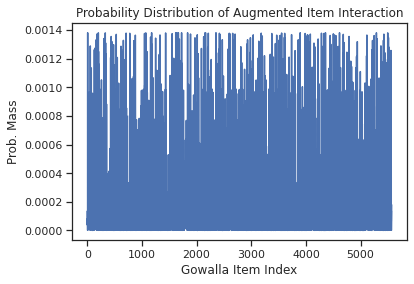

In [1050]:
plt.plot(probs_list[0])
plt.title('Distribution of Augmented Item Interaction')
plt.xlabel('Gowalla Item Index')
plt.ylabel('Prob. Mass')

Text(0, 0.5, 'Prob. Mass')

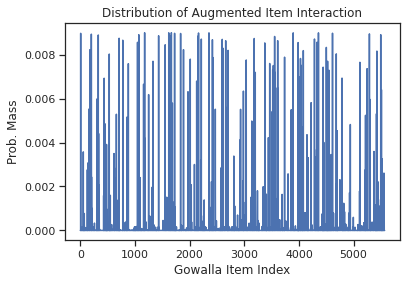

In [1051]:
plt.plot(stable_softmax(np.array(probs_list[0]), t=0.0001))
plt.title('Distribution of Augmented Item Interaction')
plt.xlabel('Gowalla Item Index')
plt.ylabel('Prob. Mass')

In [1016]:
np.mean(probs_list[0])

0.0001795654516071108

In [1017]:
np.std(probs_list[0])

0.00030969520556601427

In [1035]:
y = np.ones(len(probs_list[0]))
y = y/y.sum()
kl = KL(np.array(probs_list[0]), y)
kl

0.9564967964134322

In [1044]:
y = np.ones(len(probs_list[0]))
y = y/y.sum()
kl = KL(np.array(stable_softmax(np.array(probs_list[0]), t=0.0001)), y)
kl

3.3403030226629893

In [1023]:
print(max(probs_list[0]))
print(min(probs_list[0]))

0.001381172775510926
6.583673049137088e-08


In [1047]:
print(max(stable_softmax(np.array(probs_list[0]), t=0.0001)))
print(min(stable_softmax(np.array(probs_list[0]), t=0.0001)))

0.008994490199037386
9.034525095603125e-09


In [1007]:
np.apply_along_axis(stable_softmax, 0, item_clusters_1_9, t = 0.01)[0]

array([2.45737776e-10, 1.60722415e-05, 3.14348914e-04, 6.84106297e-10,
       6.28228931e-10, 4.05961950e-06, 1.88766078e-09, 1.23027942e-09,
       1.85792870e-05, 4.81734962e-10])

In [870]:
item_embeddings = np.load('Sanity_check/Gowalla-20/i_rep_b0e10.npy')

def get_dynamic_users(prev_block, cur_block, next_block, next_next_block, item_embeddings, block=1, k_items=10, dataset="Gowalla-20"):
    k_items, y_kmeans = get_item_cluster(item_embeddings, k_items)
    new_u_adj, new_old_adj, new_next_adj, new_next_next_adj = convert_u_adj(cur_block, prev_block, next_block, next_next_block, k_items, y_kmeans[:old_n_item], saved_file=None)
#     new_u_adj, new_old_adj, new_next_adj, new_next_next_adj = convert_u_adj(u_adj_list, old_u_adj_list, next_u_adj_list, next_next_u_adj_list, best_k, y_kmeans[:old_n_item], saved_file=None)
    np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block - 1), new_u_adj)
    np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block), new_old_adj)
    np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block + 1), new_next_adj)
    np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block + 2), new_next_next_adj)

In [871]:
old_u_adj_list = np.load("Sanity_check/Gowalla-20/old_user_item_adj_1.npy")
old_n_user, old_n_item = old_u_adj_list.shape
u_adj_list = np.load("Sanity_check/Gowalla-20/user_item_adj_1.npy")[:old_n_user, :old_n_item]
next_u_adj_list = np.load("Sanity_check/Gowalla-20/next_user_item_adj_1.npy")[:old_n_user, :old_n_item]
next_next_u_adj_list = np.load("Sanity_check/Gowalla-20/next_user_item_adj_2.npy")[:old_n_user, :old_n_item]

get_dynamic_users(u_adj_list, old_u_adj_list, next_u_adj_list, next_next_u_adj_list, item_embeddings)

  0%|          | 0/5098 [00:00<?, ?it/s]

In [872]:
new_old_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("Gowalla-20", 0))
new_u_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("Gowalla-20", 1))
new_next_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("Gowalla-20", 2))
new_next_next_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("Gowalla-20", 3))

adj_list = [new_u_adj, new_old_adj, new_next_adj, new_next_next_adj]

In [873]:
adj_list[0].shape

(5098, 10)

In [874]:
def get_jaccard_lists(adj_list):
    cumulative_adj_list = list(np.cumsum(adj_list, axis=0))
#     print(cumulative_adj_list[2].shape)
    jaccard_lists_all = []
    for i in range(3):
        cumulative_jaccard_list = []
        for j in range(adj_list[0].shape[0]):
            cumulative_jaccard_list.append(calc_jaccard(cumulative_adj_list[i][j], adj_list[i+1][j]))
        jaccard_lists_all.append(cumulative_jaccard_list)
    return jaccard_lists_all
    # Jaccard indices between 0-1, 0,1-2, 0,1,2-3
#     for i in range(new_old_adj.shape[0]):
#         cumulative_jaccard_list.append(calc_jaccard(new_old_adj[i], new_old_adj[i] + new_u_adj[i]))

In [1175]:
def get_jensen_lists(adj_list):
    cumulative_adj_list = list(np.cumsum(adj_list, axis=0))
    jensen_lists_all = []
    for i in range(3):
        cumulative_jensen_list = []
        for j in range(adj_list[0].shape[0]):
            cumulative_jensen_list.append(jensen(cumulative_adj_list[i][j], adj_list[i+1][j]))
        mean = sum(cumulative_jensen_list)/ len(cumulative_jensen_list)
        for k in range(len(cumulative_jensen_list)):
            if cumulative_jensen_list[k] < 0:
                cumulative_jensen_list[k] = mean
        jensen_lists_all.append(cumulative_jensen_list)
    return jensen_lists_all

In [1341]:
from  scipy.stats import chisquare
chisquare([16, 18, 16, 14, 12, 33],
          f_exp=[[16, 16, 16, 16, 16, 8]],
          axis=1)

Power_divergenceResult(statistic=array([79.625]), pvalue=array([1.00531355e-15]))

In [1459]:
def get_chi_square_lists(adj_list, temp = 0):
    cumulative_adj_list = list(np.cumsum(adj_list, axis=0))
    lists_all = []
    p_values_all = []
    for i in range(3):
        cumulative_KS_list = []
        p_values = []
        for j in range(adj_list[0].shape[0]):
#             (ks_2samp(adj_list[0][555] + 1, adj_list[1][555] + 1))
            exp = np.array(cumulative_adj_list[i][j] + temp)
            obs = np.array(cumulative_adj_list[i+1][j] + temp)
            assert exp.sum() <= obs.sum(), ("{}, {}".format(cumulative_adj_list[i][j], cumulative_adj_list[i+1][j]))
            cumulative_KS_list.append(chisquare(obs/obs.sum()*exp.sum(), exp)[0])
            if(j % 5000 == 0):
                print('historical', exp)
                print('new', obs/obs.sum()*exp.sum())
                print('p', chisquare(obs/obs.sum()*exp.sum(), exp)[1])
                print('\n')
            p_values.append(chisquare(obs/obs.sum()*exp.sum(), exp)[1])
        lists_all.append(cumulative_KS_list)
        p_values_all.append(p_values)
    return lists_all, p_values_all

In [1496]:
ks, p = get_chi_square_lists(adj_list, temp=0.1)

historical [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
new [0.00769231 0.08461538 0.39230769 0.00769231 0.31538462 0.00769231
 0.00769231 0.00769231 0.16153846 0.00769231]
p 0.9933627773398023


historical [0.1 3.1 0.1 0.1 0.1 0.1 0.1 6.1 0.1 0.1]
new [0.0625 3.8125 0.0625 0.0625 0.0625 0.0625 0.0625 5.6875 0.0625 0.0625]
p 0.9999964802590611


historical [0.1 1.1 5.1 0.1 4.1 0.1 0.1 0.1 2.1 0.1]
new [0.09285714 1.02142857 4.73571429 0.09285714 3.80714286 0.09285714
 0.09285714 0.09285714 2.87857143 0.09285714]
p 0.9999939533095327


historical [0.1 6.1 0.1 0.1 0.1 0.1 0.1 9.1 0.1 0.1]
new [0.07619048 5.40952381 0.07619048 0.07619048 0.07619048 0.07619048
 0.07619048 9.98095238 0.07619048 0.07619048]
p 0.9999993267500302


historical [0.1 1.1 5.1 0.1 4.1 0.1 0.1 0.1 3.1 0.1]
new [0.05384615 0.59230769 2.74615385 0.05384615 2.20769231 0.05384615
 5.97692308 0.05384615 2.20769231 0.05384615]
p 1.7007761004666313e-69


historical [ 0.1  7.1  0.1  0.1  0.1  0.1  0.1 13.1  0.1  0.1]
new [ 0.0

In [1497]:
idx = np.argsort(np.array(p[0]))

In [1498]:
idx[:25]

array([3551, 4190, 4260, 3629, 1786, 3671,  697, 1102, 4820,  116, 2028,
       3911, 2102,   45, 1820, 5042, 2265, 3912, 3482, 4070, 4547, 4487,
        855, 1970, 2461])

In [1507]:
for num in idx[0:5]:
    print('next')
    print(num)
    print(p[0][num])
    print(adj_list[0][num])
    print(adj_list[1][num])

next
3551
0.0
[ 0.  2.  0.  0.  6.  0.  0.  1.  2. 61.]
[ 0.  7. 29.  4. 13. 15.  0.  5. 49.  4.]
next
4190
9.071828859568878e-268
[ 0. 23.  0.  3.  3.  0.  0.  9. 17. 14.]
[ 0. 57. 43.  2.  5.  0.  0. 54. 35.  1.]
next
4260
2.5548949048983928e-253
[ 0.  0. 15.  0.  0.  0.  0.  0. 16.  9.]
[ 0.  0.  0. 15.  0.  0.  0.  0.  0.  0.]
next
3629
3.4042858359145307e-227
[ 0. 13.  0.  0.  4.  0.  0. 10.  0.  0.]
[ 0. 42.  0. 63.  2.  0.  0. 24. 13.  0.]
next
1786
8.232857404674387e-226
[ 0.  0. 21.  0.  0.  0.  0.  0.  7.  0.]
[ 0.  0. 88. 82.  4.  0.  0.  0. 25.  0.]


In [1509]:
for num in idx[250:255]:
    print('next')
    print(num)
    print(p[0][num])
    print(adj_list[0][num])
    print(adj_list[1][num])

next
3546
3.56427545995919e-07
[0. 2. 0. 1. 2. 0. 0. 0. 1. 0.]
[0. 2. 0. 0. 0. 0. 0. 2. 1. 5.]
next
953
4.664656732363231e-07
[1. 0. 1. 0. 0. 0. 0. 0. 0. 2.]
[ 0.  3.  4. 11.  0.  0.  0.  0. 12.  2.]
next
2960
4.735752794791461e-07
[0. 3. 0. 0. 0. 0. 0. 2. 0. 0.]
[ 0.  6.  0. 10.  0.  0.  0.  3.  4.  0.]
next
2177
4.858460157520824e-07
[0. 0. 0. 0. 0. 0. 0. 4. 0. 0.]
[ 0. 10.  0.  0.  0.  0.  0.  6.  2.  0.]
next
2501
5.282739815272885e-07
[ 0.  0. 11.  0.  0.  0.  0.  0.  0.  0.]
[ 0.  9. 39.  1.  0.  0.  0.  1. 10.  0.]


In [1512]:
print(p[0][8])
print(adj_list[0][8])
print(adj_list[1][8])

0.3597675378911965
[0. 0. 0. 0. 5. 0. 0. 0. 0. 0.]
[ 0.  0.  0.  8. 36.  0.  0.  0.  7.  2.]


In [1500]:
(np.array(p[0]) < 0.05).sum()

708

In [1501]:
(np.array(p[1]) < 0.05).sum()

204

In [1502]:
(np.array(p[2]) < 0.05).sum()

179

In [1503]:
len(ks[0])

5098

Text(0.5, 0, 'gowalla-20 user id')

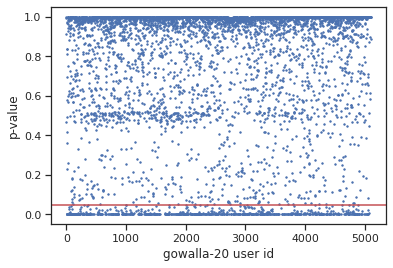

In [1504]:
plt.scatter(range(len(p[0])), p[0], s = 8, marker='.')
plt.axhline(y=0.05, color='r', linestyle='-')
plt.ylabel('p-value')
plt.xlabel('gowalla-20 user id')

Text(0.5, 0, 'gowalla-20 user id')

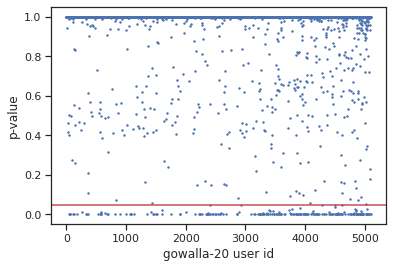

In [1505]:
plt.scatter(range(len(p[1])), p[1], s = 8, marker='.')
plt.axhline(y=0.05, color='r', linestyle='-')
plt.ylabel('p-value')
plt.xlabel('gowalla-20 user id')

Text(0.5, 0, 'gowalla-20 user id')

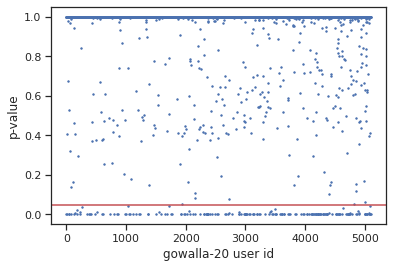

In [1506]:
plt.scatter(range(len(p[2])), p[2], s = 8, marker='.')
plt.axhline(y=0.05, color='r', linestyle='-')
plt.ylabel('p-value')
plt.xlabel('gowalla-20 user id')

(0.0, 2.0)

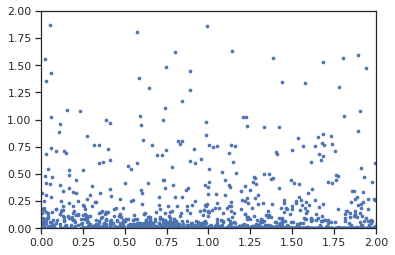

In [1517]:
plt.scatter(ks[0], ks[1], s=7)
plt.xlim(0,2)
plt.ylim(0,2)

In [1520]:
scipy.stats.spearmanr(p[0], p[1])

SpearmanrResult(correlation=0.06594609046215429, pvalue=2.446421941624335e-06)

(0.0, 2000.0)

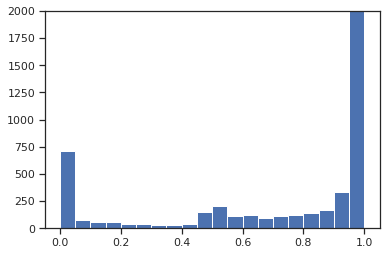

In [1514]:
plt.hist(p[0], bins=20)
plt.ylim(0,2000)

(0.0, 200.0)

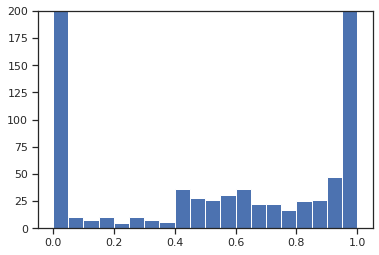

In [1515]:
plt.hist(p[1], bins=20)
plt.ylim(0, 200)

In [1516]:
jens = get_jensen_lists(adj_list)
jens = np.array(jens)

In [1177]:
def save_jensen_distances(adj_list, dataset):
    jacc = np.array(get_jaccard_lists(adj_list))
    np.save("Sanity_check/{}/jensen{}.npy".format(dataset, 0), jens[0])
    np.save("Sanity_check/{}/jensen{}.npy".format(dataset, 1), jens[1])
    np.save("Sanity_check/{}/jensen{}.npy".format(dataset, 2), jens[2])

In [1178]:
save_jensen_distances(adj_list, "Gowalla-20")

In [1476]:
def save_chi_squared(adj_list, dataset, temp=0.1):
    _, p = np.array(get_chi_square_lists(adj_list, temp))
    np.save("Sanity_check/{}/chi{}.npy".format(dataset, 0), p[0])
    np.save("Sanity_check/{}/chi{}.npy".format(dataset, 1), p[1])
    np.save("Sanity_check/{}/chi{}.npy".format(dataset, 2), p[2])

In [1477]:
save_chi_squared(adj_list, "Gowalla-20")

historical [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
new [0.00769231 0.08461538 0.39230769 0.00769231 0.31538462 0.00769231
 0.00769231 0.00769231 0.16153846 0.00769231]
p 0.9933627773398023


historical [0.1 3.1 0.1 0.1 0.1 0.1 0.1 6.1 0.1 0.1]
new [0.0625 3.8125 0.0625 0.0625 0.0625 0.0625 0.0625 5.6875 0.0625 0.0625]
p 0.9999964802590611


historical [0.1 1.1 5.1 0.1 4.1 0.1 0.1 0.1 2.1 0.1]
new [0.09285714 1.02142857 4.73571429 0.09285714 3.80714286 0.09285714
 0.09285714 0.09285714 2.87857143 0.09285714]
p 0.9999939533095327


historical [0.1 6.1 0.1 0.1 0.1 0.1 0.1 9.1 0.1 0.1]
new [0.07619048 5.40952381 0.07619048 0.07619048 0.07619048 0.07619048
 0.07619048 9.98095238 0.07619048 0.07619048]
p 0.9999993267500302


historical [0.1 1.1 5.1 0.1 4.1 0.1 0.1 0.1 3.1 0.1]
new [0.05384615 0.59230769 2.74615385 0.05384615 2.20769231 0.05384615
 5.97692308 0.05384615 2.20769231 0.05384615]
p 1.7007761004666313e-69


historical [ 0.1  7.1  0.1  0.1  0.1  0.1  0.1 13.1  0.1  0.1]
new [ 0.0

In [1478]:
len(jens[0])

5098

(array([1.509e+03, 1.446e+03, 1.113e+03, 5.970e+02, 2.750e+02, 1.060e+02,
        3.600e+01, 1.200e+01, 3.000e+00, 1.000e+00]),
 array([0.        , 0.25188331, 0.50376662, 0.75564993, 1.00753325,
        1.25941656, 1.51129987, 1.76318318, 2.01506649, 2.2669498 ,
        2.51883312]),
 <BarContainer object of 10 artists>)

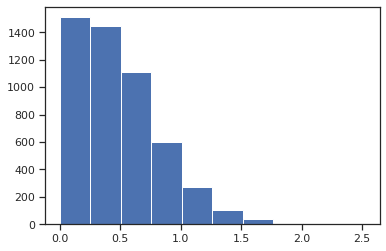

In [1479]:
plt.hist(jens[0], bins=10)

(array([1105., 1358., 1303.,  715.,  370.,  159.,   58.,   19.,    7.,
           4.]),
 array([0.        , 0.23698501, 0.47397001, 0.71095502, 0.94794003,
        1.18492504, 1.42191004, 1.65889505, 1.89588006, 2.13286506,
        2.36985007]),
 <BarContainer object of 10 artists>)

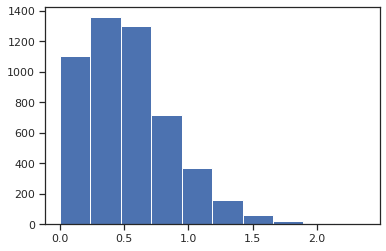

In [1181]:
plt.hist(jens[1], bins=10)

(array([ 853., 1408., 1436.,  791.,  393.,  139.,   55.,   13.,    7.,
           3.]),
 array([4.19637416e-04, 2.48053800e-01, 4.95687962e-01, 7.43322125e-01,
        9.90956287e-01, 1.23859045e+00, 1.48622461e+00, 1.73385877e+00,
        1.98149294e+00, 2.22912710e+00, 2.47676126e+00]),
 <BarContainer object of 10 artists>)

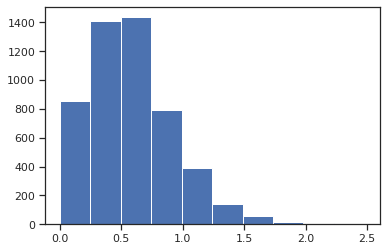

In [1182]:
plt.hist(jens[2], bins=10)

Text(0, 0.5, 'Hedges Wave')

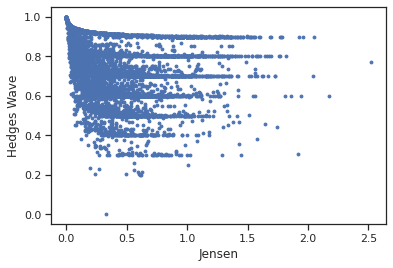

In [1205]:
plt.scatter(jens[0], jacc[0], s=8)
plt.xlabel('Jensen')
plt.ylabel('Hedges Wave')

Text(0, 0.5, 'Jensen [1-2]')

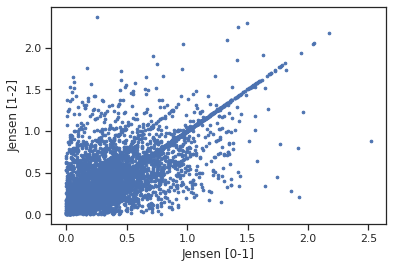

In [1206]:
plt.scatter(jens[0], jens[1], s=7)
plt.xlabel('Jensen [0-1]')
plt.ylabel('Jensen [1-2]')

Text(0, 0.5, 'Jensen [2-3]')

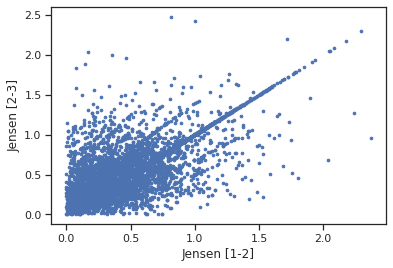

In [1207]:
plt.scatter(jens[1], jens[2], s=7)
plt.xlabel('Jensen [1-2]')
plt.ylabel('Jensen [2-3]')

Text(0, 0.5, 'Jensen [2-3]')

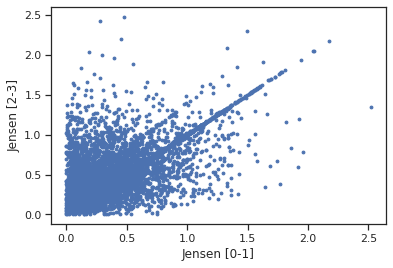

In [1186]:
plt.scatter(jens[0], jens[2], s=8)
plt.xlabel('Jensen [0-1]')
plt.ylabel('Jensen [2-3]')

In [1201]:
sort_jens = np.argsort(jens[0])
print(sort_jens[-10:])
print(jens[0][2010])
print(adj_list[0][2010])
print(adj_list[1][2010])
print(jens[1][2010])
print(adj_list[2][2010])
print(jens[0][2247])
print(adj_list[0][2247])
print(adj_list[1][2247])
print(jens[1][2247])
print(adj_list[2][2247])
print(jens[0][131])
print(adj_list[0][131])
print(adj_list[1][131])
print(jens[1][131])
print(adj_list[2][131])

[ 131 4260 3551 2780  236  589 1223  507   30 2247]
1.2523756949296063
[0. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
[24.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.4683828754769248
[2. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2.518833116054015
[ 0.  0.  1.  0.  0.  0.  0.  0.  2. 70.]
[ 0.  0. 21.  0.  0.  0.  0.  0.  3.  0.]
0.8746841248728668
[0. 0. 2. 0. 0. 0. 0. 0. 0. 1.]
1.8162639629574042
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0.  1.  0.  0. 96.  0.  0.  0.  0.  0.]
1.7338372058613953
[0. 5. 0. 1. 2. 0. 0. 0. 5. 0.]


In [1190]:
sort_jens = np.argsort(jens[0])
print(sort_jens[:10])
print(jens[0][555])
print(adj_list[0][555])
print(adj_list[1][555])

[5011 4830 4016 4803 5037 3751 4689 3295 3637 4638]
0.2707441978963405
[0. 6. 0. 0. 0. 0. 0. 4. 2. 0.]
[ 0. 63. 10. 16.  0.  0.  0. 41.  9.  0.]


In [1192]:
print(adj_list[0][4764 ], adj_list[1][4764 ], adj_list[2][4764])

[0. 0. 0. 7. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.] [0. 0. 0. 3. 0. 0. 0. 0. 1. 0.]


In [1202]:
from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test
print(ks_2samp(adj_list[0][555] + 1, adj_list[1][555] + 1))
print(ks_2samp(adj_list[0][2010] + 1, adj_list[1][2010] + 1))
print(ks_2samp(adj_list[1][2010] + 1, adj_list[2][2010] + 1))
print(ks_2samp(adj_list[0][4764] + 1,  adj_list[1][4764] + 1))


Ks_2sampResult(statistic=0.5, pvalue=0.16782134274394334)
Ks_2sampResult(statistic=0.1, pvalue=1.0)
Ks_2sampResult(statistic=0.1, pvalue=1.0)
Ks_2sampResult(statistic=0.1, pvalue=1.0)


In [1203]:
scipy.stats.spearmanr(jens[0], jacc[0])

SpearmanrResult(correlation=-0.22380413546063904, pvalue=6.819194907271656e-59)

In [1204]:
scipy.stats.spearmanr(jens[0], jens[2])

SpearmanrResult(correlation=0.5209623356945497, pvalue=0.0)

In [875]:
jacc = get_jaccard_lists(adj_list)
jacc = np.array(jacc)

In [876]:
def save_jaccard_indices(adj_list, dataset):
    jacc = np.array(get_jaccard_lists(adj_list))
    np.save("Sanity_check/{}/jaccard{}.npy".format(dataset, 0), jacc[0])
    np.save("Sanity_check/{}/jaccard{}.npy".format(dataset, 1), jacc[1])
    np.save("Sanity_check/{}/jaccard{}.npy".format(dataset, 2), jacc[2])

In [877]:
save_jaccard_indices(adj_list, "Gowalla-20")

In [878]:
len(jacc[0])

5098

In [1053]:
jacc[0] = np.load("Sanity_check/{}/jaccard{}.npy".format("Gowalla-20", 0))
jacc[1] = np.load("Sanity_check/{}/jaccard{}.npy".format("Gowalla-20", 1))
jacc[2] = np.load("Sanity_check/{}/jaccard{}.npy".format("Gowalla-20", 2))

In [1054]:
# (jacc[2] - np.load("Sanity_check/{}/jaccard{}.npy".format("Gowalla-20", 2))).sum()

In [1055]:
len(jacc[1])

5098

In [1056]:
kk = np.argsort(jacc[0])

In [1057]:
print(jacc[0])
print(kk[180:200])
print(jacc[0][1528])
print(jacc[0][4433])
# print(np.argsort(jacc[0]))

[0.6        0.6125     0.20344828 ... 0.9        0.50909091 0.61666667]
[3150  825  577 1693 4439  100   70 1652 5048  147   40   99   44   11
  211 2777 2619  109 2626  750]
0.0
0.9375


In [1058]:
print(jacc[0][2920])
print(new_old_adj[2920])
print(new_u_adj[2920])

0.611375
[ 0. 50.  0. 17.  0.  0.  0. 32.  9.  0.]
[0. 1. 0. 0. 0. 0. 0. 3. 0. 0.]


In [1059]:
print(new_old_adj[0])
print(new_u_adj[0])

[0. 1. 5. 0. 4. 0. 0. 0. 2. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [1060]:
jacc = np.array(jacc)

(array([1.000e+00, 1.000e+00, 2.200e+01, 1.170e+02, 3.440e+02, 8.080e+02,
        1.218e+03, 1.099e+03, 6.620e+02, 8.260e+02]),
 array([0.      , 0.099375, 0.19875 , 0.298125, 0.3975  , 0.496875,
        0.59625 , 0.695625, 0.795   , 0.894375, 0.99375 ]),
 <BarContainer object of 10 artists>)

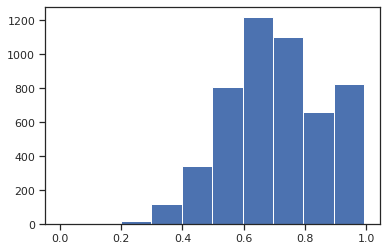

In [1061]:
plt.hist(jacc[2], bins=10)

Text(0, 0.5, 'Jaccard indices of block 1')

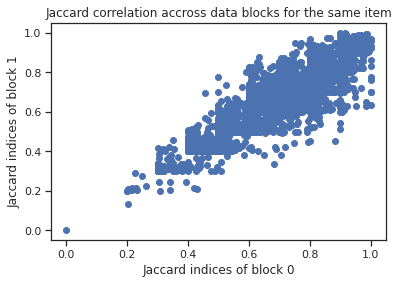

In [1066]:
plt.scatter(jacc[0], jacc[1])
plt.title('Jaccard correlation accross data blocks for the same item')
plt.xlabel("Jaccard indices of block 0")
plt.ylabel("Jaccard indices of block 1")

Text(0, 0.5, 'Jaccard indices of block 2')

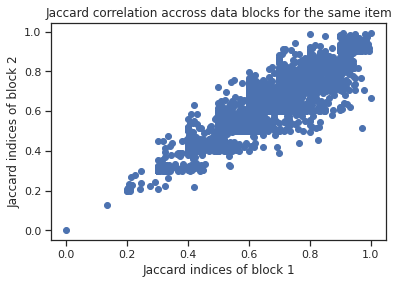

In [1068]:
plt.scatter(jacc[1], jacc[2])
plt.title('Jaccard correlation accross data blocks for the same item')
plt.xlabel("Jaccard indices of block 1")
plt.ylabel("Jaccard indices of block 2")

Text(0, 0.5, 'Jaccard indices of block 2')

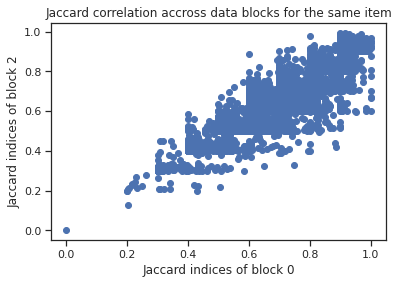

In [1069]:
plt.scatter(jacc[0], jacc[2])
plt.title('Jaccard correlation accross data blocks for the same item')
plt.xlabel("Jaccard indices of block 0")
plt.ylabel("Jaccard indices of block 2")

In [891]:
jacc[0][100]

0.4

In [892]:
jacc[1][100]

0.4

In [893]:
jacc[2][100]

0.40857142857142853

In [894]:
scipy.stats.spearmanr(jacc[0], jacc[1])

SpearmanrResult(correlation=0.9148874418926692, pvalue=0.0)

In [895]:
scipy.stats.spearmanr(jacc[1], jacc[2])

SpearmanrResult(correlation=0.9304251106965944, pvalue=0.0)

In [618]:
old_u_adj_list = np.load("Sanity_check/Gowalla-20/old_user_item_adj_1.npy")
old_n_user, old_n_item = old_u_adj_list.shape
u_adj_list = np.load("Sanity_check/Gowalla-20/user_item_adj_1.npy")[:old_n_user, :old_n_item]
next_u_adj_list = np.load("Sanity_check/Gowalla-20/next_user_item_adj_1.npy")[:old_n_user, :old_n_item]
next_next_u_adj_list = np.load("Sanity_check/Gowalla-20/next_user_item_adj_2.npy")[:old_n_user, :old_n_item]
new_u_adj, new_old_adj, new_next_adj, new_next_next_u_adj = convert_u_adj(u_adj_list, old_u_adj_list, next_u_adj_list, next_next_u_adj_list, best_k, y_kmeans[:old_n_item], saved_file=None)

  0%|          | 0/5098 [00:00<?, ?it/s]

In [637]:
(new_next_next_u_adj - np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("Gowalla-20", 3))).sum()

0.0

In [619]:
np.save(f"Sanity_check/Gowalla-20/new_u_adj.npy", new_u_adj)
np.save(f"Sanity_check/Gowalla-20/new_old_adj.npy", new_old_adj)
np.save(f"Sanity_check/Gowalla-20/new_next_adj.npy", new_next_adj)
np.save(f"Sanity_check/Gowalla-20/new_next_next_adj.npy", new_next_next_u_adj)

In [566]:
new_u_adj.shape

(5098, 10)

In [567]:
new_u_adj[55]

array([0., 0., 0., 0., 0., 0., 0., 3., 0., 0.])

In [568]:
new_old_adj[55]

array([ 0.,  5.,  0.,  1.,  1.,  0.,  0., 60.,  0.,  0.])

In [569]:
new_next_adj[55]

array([0., 0., 0., 0., 0., 0., 0., 8., 0., 0.])

In [570]:
user_emb_b0 = np.load('Sanity_check/Gowalla-20/u_rep_b0e17.npy')
user_emb_b1 = np.load('Sanity_check/Gowalla-20/u_rep_b1e3.npy')[:user_emb_b0.shape[0]]
user_emb_b2 = np.load('Sanity_check/Gowalla-20/u_rep_b2e3.npy')[:user_emb_b0.shape[0]]

In [571]:
calc_l2(user_emb_b0[55], user_emb_b1[55])

1.7066378621939962

In [572]:
calc_l2(user_emb_b2[55], user_emb_b1[55])

1.3718401571746437

In [573]:
calc_l2(user_emb_b0[55], user_emb_b2[55])

1.686275806719666

In [574]:
user_emb_b0[55]

array([-0.09663812, -0.01083299,  0.3226869 , -0.02398845,  0.37409199,
        0.04387468, -0.04064237, -0.15180178, -0.15209747, -0.01064202,
        0.22591685,  0.126346  , -0.00358873,  0.51679101, -0.28609539,
        0.38110467, -0.24202375, -0.55142555, -0.01673142, -0.20113164,
        0.20602707, -0.25909486,  0.11405149, -0.51571336,  0.01100014,
       -0.36396493, -0.04610116,  0.2262388 ,  0.57645683, -0.2696408 ,
       -0.2097895 ,  0.03475739,  0.20658268,  0.03867604,  0.08873919,
        0.11548266,  0.02081429, -0.54903358,  0.20967334,  0.16802335,
        0.02688161,  0.00448179, -0.0818341 , -0.15617238,  0.05021892,
        0.17617918, -0.38963699,  0.40007984,  0.42091344, -0.14151774,
       -0.16101237,  0.28716641,  0.30669001, -0.18803333,  0.32779973,
       -0.00635553, -0.01133896,  0.12669274, -0.40672446, -0.24884632,
       -0.04351515, -0.13097803,  0.19964788,  0.02980177, -0.09662572,
       -0.38971754,  0.12333397,  0.04391051,  0.1231393 , -0.42

In [575]:
user_emb_b2[55]

array([-0.12500351,  0.14492408,  0.20472248, -0.36748666,  0.37603788,
        0.07590256, -0.26138486, -0.19125339, -0.2436997 , -0.20186448,
        0.27863205,  0.50219251, -0.15066297,  0.43888448, -0.21164897,
        0.52166851, -0.50662296, -0.51963589, -0.04548465, -0.33341627,
        0.17842074, -0.19944756,  0.26608608, -0.664327  ,  0.11040051,
       -0.52042211, -0.42139313,  0.15366036,  0.43906764, -0.03112479,
        0.18499775, -0.02373026,  0.06983979,  0.35206136,  0.10428137,
       -0.11847642, -0.0128001 , -0.64645226,  0.09647183,  0.3060536 ,
        0.0323944 , -0.05495744,  0.03292445, -0.00708692,  0.02098904,
        0.2693723 , -0.42085952,  0.34673076,  0.29285339, -0.28764517,
       -0.00351804,  0.28886273,  0.37964993, -0.13127068,  0.4955859 ,
        0.00663469,  0.01068085,  0.14709122, -0.55988308, -0.15370168,
       -0.22656988, -0.2216815 ,  0.16228561,  0.14499992,  0.0619638 ,
       -0.05329899,  0.37976867, -0.11520222,  0.22298137, -0.75

In [576]:
user_emb_b0.shape

(5098, 128)

In [577]:
calc_jaccard(new_old_adj[55], new_u_adj[55])

0.605

In [578]:
new_next_adj

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 3., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [579]:
jaccard_list = []
for i in range(new_old_adj.shape[0]):
    jaccard_list.append(calc_jaccard(new_old_adj[i], new_u_adj[i]))

jaccard_list_future = []
for i in range(new_old_adj.shape[0]):
    jaccard_list_future.append(calc_jaccard(new_u_adj[i], new_next_adj[i]))

In [580]:
cumulative_jaccard_list = []
for i in range(new_old_adj.shape[0]):
    cumulative_jaccard_list.append(calc_jaccard(new_old_adj[i], new_old_adj[i] + new_u_adj[i]))

(array([1.000e+00, 2.000e+00, 3.200e+01, 5.100e+01, 1.880e+02, 8.740e+02,
        1.084e+03, 7.990e+02, 1.024e+03, 1.043e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

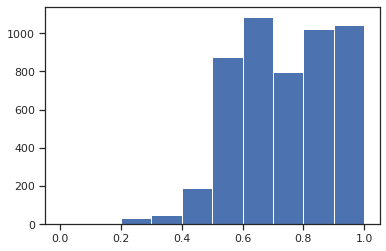

In [581]:
plt.hist(jaccard_list, bins=10)

(array([2.000e+00, 0.000e+00, 5.000e+00, 2.400e+01, 8.400e+01, 1.350e+02,
        5.200e+02, 8.530e+02, 1.386e+03, 2.089e+03]),
 array([0.22857143, 0.30571429, 0.38285714, 0.46      , 0.53714286,
        0.61428571, 0.69142857, 0.76857143, 0.84571429, 0.92285714,
        1.        ]),
 <BarContainer object of 10 artists>)

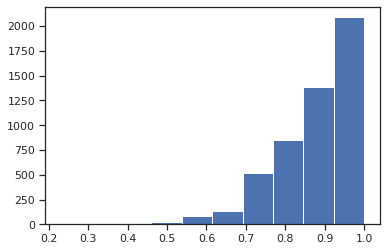

In [608]:
plt.hist(jaccard_list_future, bins=10)

(array([2.000e+00, 2.000e+00, 4.000e+00, 1.500e+01, 3.500e+01, 8.100e+01,
        1.570e+02, 3.960e+02, 6.620e+02, 3.744e+03]),
 array([0.4013834 , 0.46124506, 0.52110672, 0.58096838, 0.64083004,
        0.7006917 , 0.76055336, 0.82041502, 0.88027668, 0.94013834,
        1.        ]),
 <BarContainer object of 10 artists>)

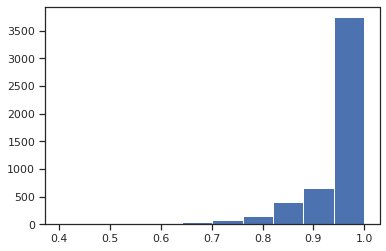

In [609]:
plt.hist(cumulative_jaccard_list, bins=10)

In [584]:
cumulative_jaccard_list

[1.0,
 0.9933333333333334,
 0.9966666666666667,
 1.0,
 1.0,
 0.9935483870967742,
 0.8326171118854045,
 0.9953846153846154,
 0.9878048780487806,
 0.9647058823529411,
 0.9924211938296444,
 1.0,
 0.9747921011999893,
 0.9836065573770492,
 0.9863636363636363,
 1.0,
 0.9974358974358974,
 0.8633879781420765,
 0.9370149253731344,
 1.0,
 0.8795950519313805,
 0.9531372549019608,
 0.971304347826087,
 1.0,
 0.9857142857142858,
 0.9880000000000001,
 1.0,
 0.9661064425770307,
 0.9683333333333334,
 0.9,
 1.0,
 1.0,
 0.8882352941176471,
 0.9875,
 0.9954545454545455,
 1.0,
 0.9925791855203621,
 1.0,
 1.0,
 0.9556618357487924,
 1.0,
 0.865079365079365,
 1.0,
 0.88125,
 1.0,
 0.8823529411764707,
 1.0,
 0.9744985525227461,
 0.9978260869565219,
 0.9764705882352942,
 0.9857142857142858,
 1.0,
 0.9769341949829755,
 0.9460770975056689,
 1.0,
 0.9952380952380953,
 0.9905701754385966,
 0.9944444444444445,
 0.9897959183673469,
 1.0,
 0.9921695536102316,
 0.9979166666666666,
 0.9800000000000001,
 1.0,
 1.0,
 1.0,

<AxesSubplot:ylabel='Count'>

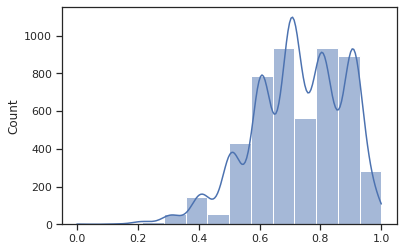

In [896]:
sns.histplot(jaccard_list, kde=True, bins=14)

In [897]:
state_vector_list = []
for i in range(new_old_adj.shape[0]):
    state_vector_list.append(calc_l2(new_old_adj[i], new_u_adj[i]))

(array([1288., 1781.,  968.,  456.,  229.,  129.,   72.,   51.,   39.,
          28.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

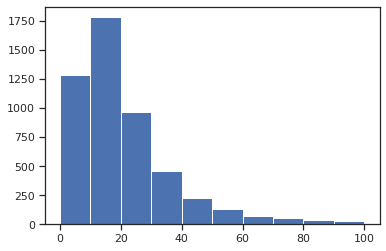

In [898]:
plt.hist(state_vector_list, bins=10, range=[0,100])

(0.0, 100.0)

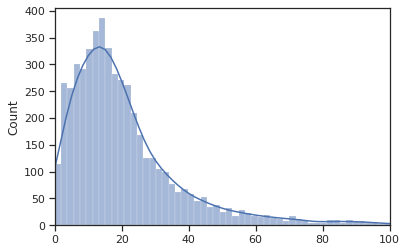

In [899]:
sns.histplot(state_vector_list, kde=True)
plt.xlim(0,100)

In [900]:
np.corrcoef(jaccard_list, state_vector_list)

array([[ 1.        , -0.30104575],
       [-0.30104575,  1.        ]])

In [901]:
np.corrcoef(jaccard_list[:250], state_vector_list[:250])

array([[ 1.        , -0.40295468],
       [-0.40295468,  1.        ]])

In [902]:
scipy.stats.kendalltau(jaccard_list, state_vector_list)

KendalltauResult(correlation=-0.21987101956633284, pvalue=4.0105887819611096e-119)

In [903]:
scipy.stats.kendalltau(jaccard_list[:250], state_vector_list[:250])

KendalltauResult(correlation=-0.2722056731967133, pvalue=2.675280890414374e-10)

In [904]:
scipy.stats.spearmanr(jaccard_list, state_vector_list)

SpearmanrResult(correlation=-0.30847959990277, pvalue=8.009518573545718e-113)

In [905]:
scipy.stats.spearmanr(cumulative_jaccard_list, state_vector_list)

SpearmanrResult(correlation=0.36073650947816155, pvalue=1.6564691259654251e-156)

In [906]:
scipy.stats.spearmanr(cumulative_jaccard_list[:250], state_vector_list[:250])

SpearmanrResult(correlation=-0.07517436791574347, pvalue=0.2362821060282426)

In [907]:
scipy.stats.spearmanr(jaccard_list[:250], state_vector_list[:250])

SpearmanrResult(correlation=-0.39397578907733055, pvalue=1.0380550924658964e-10)

In [908]:
scipy.stats.spearmanr(jaccard_list[:250], state_vector_list[:250])

SpearmanrResult(correlation=-0.39397578907733055, pvalue=1.0380550924658964e-10)

In [909]:
scipy.stats.spearmanr(jaccard_list, jaccard_list_future)

SpearmanrResult(correlation=0.08467288717649563, pvalue=1.4036426411231825e-09)

In [910]:
np.corrcoef(jaccard_list, jaccard_list_future)

array([[1.        , 0.14919202],
       [0.14919202, 1.        ]])

In [911]:
scipy.stats.spearmanr(cumulative_jaccard_list, jaccard_list_future)

SpearmanrResult(correlation=0.6888550591960072, pvalue=0.0)

In [912]:
scipy.stats.spearmanr(cumulative_jaccard_list, state_vector_list)

SpearmanrResult(correlation=0.36073650947816155, pvalue=1.6564691259654251e-156)

### Same analysis for Taobao 2014

In [500]:
np.load('Sanity_check/taobao1/i_rep_b1e1.npy')-np.load('Sanity_check/taobao1/i_rep_b1e10.npy') # first layer

array([[ 0.18977212,  0.07465752,  0.13323822, ...,  0.0741361 ,
         0.14977315,  0.13062007],
       [ 0.06950539,  0.00248714, -0.02783622, ...,  0.07218809,
         0.00595022, -0.02338754],
       [-0.3274235 , -0.05876044, -0.10862799, ..., -0.10532948,
        -0.18947497, -0.11262792],
       ...,
       [-0.05691182, -0.00274529, -0.11291194, ..., -0.11145334,
        -0.01929258, -0.07008058],
       [ 0.40924574, -0.15441833,  0.04631974, ...,  0.12269834,
         0.40566768,  0.11079862],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [505]:
data_generator = Data(dataset='taobao1', split=[0.6,3,0.1], 
                        shuffle=True, split_mode='abs', test_ratio=0,
                        seed=22)
data_blocks = data_generator.blocks
data_blocks[2].keys()

dict_keys(['train', 'n_user_train', 'n_item_train', 'val', 'n_user_val', 'n_item_val', 'test', 'n_user_test', 'n_item_test', 'acc_train', 'acc_train_plus_val', 'acc_train_plus_val_test', 'train_matrix', 'val_matrix', 'test_matrix'])

In [506]:
for i in range(1,4):

    train_matrix = data_blocks[i]['train']

    n_item = data_blocks[i]['n_item_train']
    n_user = data_blocks[i]['n_user_train']
    u_adj_list = convert_adj(train_matrix, n_item)
    

    old_train_matrix = data_blocks[i-1]['train']
    old_n_item = data_blocks[i-1]['n_item_train']
    old_n_user = data_blocks[i-1]['n_user_train']
    
    old_u_adj_list = convert_adj(old_train_matrix, old_n_item)
    np.save(f"Sanity_check/taobao1/user_item_adj_{i}.npy", u_adj_list)
    np.save(f"Sanity_check/taobao1/old_user_item_adj_{i}.npy", old_u_adj_list)
    if i!= 3:
        next_train_matrix = data_blocks[i+1]['train']
        next_n_item = data_blocks[i+1]['n_item_train']
        next_n_user = data_blocks[i+1]['n_user_train']
        next_u_adj_list = convert_adj(next_train_matrix, next_n_item)
        np.save(f"Sanity_check/taobao1/next_user_item_adj_{i}.npy", next_u_adj_list)

    
    if i == 3:
        n_test_item = data_blocks[i]['n_item_test']
        u_adj_list_test = data_blocks[i]['test']
        n_val_item = data_blocks[i]['n_item_val']
        u_adj_list_val = data_blocks[i]['val']
        next_u_adj_matrix = union_lists_of_list(u_adj_list_test, u_adj_list_val)
        next_u_adj_list = convert_adj(next_u_adj_matrix, max(n_test_item, n_val_item))
        
        np.save(f"Sanity_check/taobao1/next_user_item_adj_{i}.npy", next_u_adj_list)
        

In [503]:
item_embeddings = np.load('Sanity_check/taobao1/i_rep_b1e18.npy')
best_k, y_kmeans = get_item_cluster(item_embeddings)

Choose_K
6


In [507]:
old_u_adj_list = np.load("Sanity_check/taobao1/old_user_item_adj_1.npy")
old_n_user, old_n_item = old_u_adj_list.shape
u_adj_list = np.load("Sanity_check/taobao1/user_item_adj_1.npy")[:old_n_user, :old_n_item]
next_u_adj_list = np.load("Sanity_check/taobao1/next_user_item_adj_1.npy")[:old_n_user, :old_n_item]
new_u_adj, new_old_adj, new_next_adj = convert_u_adj(u_adj_list, old_u_adj_list, next_u_adj_list, best_k, y_kmeans[:old_n_item], saved_file=None)

  0%|          | 0/8691 [00:00<?, ?it/s]

In [508]:
np.save(f"Sanity_check/taobao1/new_u_adj.npy", new_u_adj)
np.save(f"Sanity_check/taobao1/new_old_adj.npy", new_old_adj)
np.save(f"Sanity_check/taobao1/new_next_adj.npy", new_next_adj)

In [509]:
jaccard_list_future = []
for i in range(new_old_adj.shape[0]):
    jaccard_list_future.append(calc_jaccard(new_u_adj[i], new_next_adj[i]))
    
cumulative_jaccard_list = []
for i in range(new_old_adj.shape[0]):
    cumulative_jaccard_list.append(calc_jaccard(new_old_adj[i], new_old_adj[i] + new_u_adj[i]))

(array([   7.,   19.,   50.,   89.,  160.,  289.,  583., 1069., 1810.,
        4615.]),
 array([0.11111111, 0.2       , 0.28888889, 0.37777778, 0.46666667,
        0.55555556, 0.64444444, 0.73333333, 0.82222222, 0.91111111,
        1.        ]),
 <BarContainer object of 10 artists>)

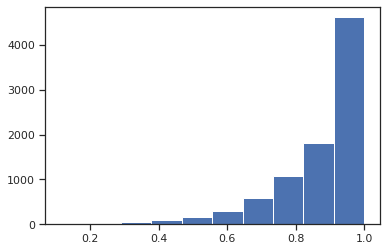

In [510]:
plt.hist(cumulative_jaccard_list, bins=10)

(array([ 227.,  484.,  598., 1350.,  862., 1685., 1320.,  338.,  833.,
         994.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

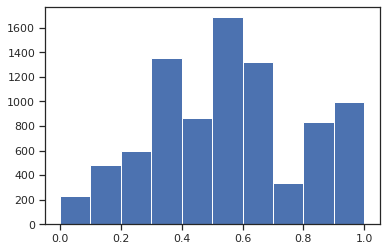

In [511]:
plt.hist(jaccard_list_future, bins=10)

In [512]:
scipy.stats.spearmanr(cumulative_jaccard_list, jaccard_list_future)

SpearmanrResult(correlation=0.44937721909640294, pvalue=0.0)

In [1525]:
data_generator = Data(dataset='taobao1', split=[0.6,3,0.1], 
                        shuffle=True, split_mode='abs', test_ratio=0,
                        seed=22)
data_blocks = data_generator.blocks
data_blocks[2].keys()

item_embeddings = np.load('Sanity_check/taobao1/i_rep_b1e18.npy')
best_k, y_kmeans = get_item_cluster(item_embeddings, 30)

old_u_adj_list = np.load("Sanity_check/taobao1/old_user_item_adj_1.npy")
old_n_user, old_n_item = old_u_adj_list.shape
u_adj_list = np.load("Sanity_check/taobao1/user_item_adj_1.npy")[:old_n_user, :old_n_item]
next_u_adj_list = np.load("Sanity_check/taobao1/next_user_item_adj_1.npy")[:old_n_user, :old_n_item]
new_next_u_adj_list = np.load("Sanity_check/taobao1/next_user_item_adj_2.npy")[:old_n_user, :old_n_item]

new_u_adj, new_old_adj, new_next_adj, next_next_u_adj_list = convert_u_adj(u_adj_list, old_u_adj_list, next_u_adj_list, new_next_u_adj_list, best_k, y_kmeans[:old_n_item], saved_file=None)

# def get_dynamic_users(prev_block, cur_block, next_block, next_next_block, item_embeddings, block=1, k_items=30, dataset="taobao1"):
#     k_items, y_kmeans = get_item_cluster(item_embeddings, k_items)
#     new_u_adj, new_old_adj, new_next_adj, new_next_next_adj = convert_u_adj(cur_block, prev_block, next_block, next_next_block, k_items, y_kmeans[:old_n_item], saved_file=None)
# #     new_u_adj, new_old_adj, new_next_adj, new_next_next_adj = convert_u_adj(u_adj_list, old_u_adj_list, next_u_adj_list, next_next_u_adj_list, best_k, y_kmeans[:old_n_item], saved_file=None)

dataset = 'taobao1'
block = 1
np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block - 1), new_u_adj)
np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block), new_old_adj)
np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block + 1), new_next_adj)
np.save("Sanity_check/{}/ui_cluster_block_{}.npy".format(dataset, block + 2), new_next_next_adj)

# old_u_adj_list = np.load("Sanity_check/taobao1/old_user_item_adj_1.npy")
# old_n_user, old_n_item = old_u_adj_list.shape
# u_adj_list = np.load("Sanity_check/taobao1/user_item_adj_1.npy")[:old_n_user, :old_n_item]
# next_u_adj_list = np.load("Sanity_check/taobao1/next_user_item_adj_1.npy")[:old_n_user, :old_n_item]
# next_next_u_adj_list = np.load("Sanity_check/taobao1/next_user_item_adj_2.npy")[:old_n_user, :old_n_item]

# get_dynamic_users(u_adj_list, old_u_adj_list, next_u_adj_list, next_next_u_adj_list, item_embeddings)

  0%|          | 0/8691 [00:00<?, ?it/s]

In [1540]:
old_u_adj_list = np.load("Sanity_check/taobao1/old_user_item_adj_1.npy")
old_n_user, old_n_item = old_u_adj_list.shape
new_old_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("taobao1", 0))
new_u_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("taobao1", 1))[:old_n_user, :old_n_item]
new_next_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("taobao1", 2))[:old_n_user, :old_n_item]
new_next_next_adj = np.load("Sanity_check/{}/ui_cluster_block_{}.npy".format("taobao1", 3))[:old_n_user, :old_n_item]

adj_list = [new_u_adj, new_old_adj, new_next_adj]

In [1542]:
print(adj_list[0].shape)
print(adj_list[1].shape)
print(adj_list[2].shape)
# print(adj_list[3].shape)

(8691, 30)
(8691, 30)
(8691, 30)


In [1543]:
adj_list[0][0]

array([ 6.,  1.,  0.,  1., 41.,  0., 14.,  4., 10.,  2.,  6.,  2.,  1.,
        1.,  3.,  0., 10.,  2.,  0.,  5.,  0.,  1.,  0.,  5., 19.,  4.,
       14.,  2.,  0.,  0.])

In [1546]:
def get_chi_square_lists2(adj_list, temp = 0):
    cumulative_adj_list = list(np.cumsum(adj_list, axis=0))
    lists_all = []
    p_values_all = []
    for i in range(2):
        cumulative_KS_list = []
        p_values = []
        for j in range(adj_list[0].shape[0]):
#             (ks_2samp(adj_list[0][555] + 1, adj_list[1][555] + 1))
            exp = np.array(cumulative_adj_list[i][j] + temp)
            obs = np.array(cumulative_adj_list[i+1][j] + temp)
            assert exp.sum() <= obs.sum(), ("{}, {}".format(cumulative_adj_list[i][j], cumulative_adj_list[i+1][j]))
            cumulative_KS_list.append(chisquare(obs/obs.sum()*exp.sum(), exp)[0])
            p_values.append(chisquare(obs/obs.sum()*exp.sum(), exp)[1])
        lists_all.append(cumulative_KS_list)
        p_values_all.append(p_values)
    return lists_all, p_values_all

In [1570]:
def save_chi_squared2(adj_list, dataset, temp=0.1):
    _, p = np.array(get_chi_square_lists2(adj_list, temp))
    np.save("Sanity_check/{}/chi{}.npy".format(dataset, 1), p[0])
    np.save("Sanity_check/{}/chi{}.npy".format(dataset, 2), p[1])
#     np.save("Sanity_check/{}/chi{}.npy".format(dataset, 2), p[2])

In [1571]:
save_chi_squared2(adj_list, 'taobao1', temp=0.1)

In [1572]:
chi_sq_0 = np.load("Sanity_check/{}/chi{}.npy".format('taobao1', 1))
chi_sq_1 = np.load("Sanity_check/{}/chi{}.npy".format('taobao1', 2))

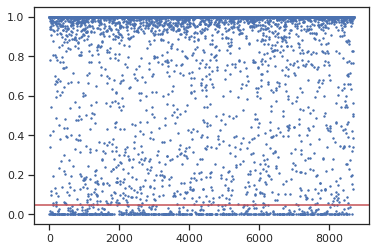

In [1573]:
plt.scatter(range(chi_sq_0.shape[0]), chi_sq_0, s = 8, marker='.')
plt.axhline(y=0.05, color='r', linestyle='-')

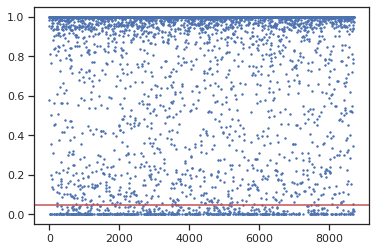

In [1574]:
plt.scatter(range(chi_sq_1.shape[0]), chi_sq_1, s = 8, marker='.')
plt.axhline(y=0.05, color='r', linestyle='-')

In [1575]:
(chi_sq_0 < 0.05).sum()

522

In [1576]:
(chi_sq_1 < 0.05).sum()

557